# Trabajo Semanal 1

## Calculos

### Funcion de transferencia

![title](https://github.com/brunogle/TrabajosSemanalesTC2/blob/master/TS1/img/circuit.png?raw=1)

Para encontrar la transferencia asumimos que las corrientes de entrada al amplificador operacional son nulas, pero que la ganancia NO es infinita $A < \infty $

Primero expresamos las tensiones de los terminales de entrada del amplificador en funcion de $V_1$ y $V_2$ usando leyes circuitales basicas.


\begin{align*}
                          V_+(s) &= \frac{V_1(s) + V_2(s)}{2} & V_-(s) &= V_1(s)\frac{R_3 C s}{R_3 C s + 1}
\end{align*}

Luego remplazamos en la ecuacion caracteristica del amplificador operacional

\begin{align*}
                          V_2(s) &= A(V_+(s) - V_-(s)) \\[10pt]
                          V_2(s) &= A\left(\frac{V_1(s) + V_2(s)}{2} - V_1(s)\frac{R_3 C s}{R_3 C s + 1}\right)
\end{align*}

Separando en terminos de $V_1$ y $V_2$.

\begin{align*}
                          \left(1 - \frac{A}{2}\right)V_2(s) &= \left(\frac{A}{2}  - A\frac{R_3 C s}{R_3 C s + 1}\right)V_1(s)
\end{align*}

Reordenando para obtener $\frac{V_2}{V_1} = H(s)$

\begin{align*}
    H(s) &= \frac{V_2(s)}{V_1(s)} = \frac{\frac{A}{2}  - A\frac{R_3 C s}{R_3 C s + 1}}{1 - \frac{A}{2}} \\[10pt]
    H(s) &= \frac{A}{A + 2} \frac{R_3 C s - 1}{R_3 C s + 1}
\end{align*}



### Resultados auxiliares

#### Modulo para frecuencias puramente imaginarias

Tomando $s = i\omega$, remplazamos en la funcion de transferencia

\begin{align*}
    H(i\omega) &= \frac{A}{A + 2} \frac{R_3 C i \omega - 1}{R_3 C i \omega + 1} \\[10pt]
  |H(i\omega)| &= \frac{A}{A + 2} \frac{|R_3 C i \omega - 1|}{|R_3 C i \omega + 1|} \\[10pt]
  |H(i\omega)| &= \frac{A}{A + 2} \frac{\sqrt{\left(R_3 C i \omega\right)^2  + 1^2}}{\sqrt{\left(R_3 C i \omega\right)^2 + 1^2}} \\[10pt]
  |H(i\omega)| &= \frac{A}{A + 2} \\[10pt]
\end{align*}

En el caso de que $A \to \infty$, $|H(i\omega)| \to 1$



#### Fase para frecuencias puramente imaginarias

Tambien, tomando $s = i\omega$

\begin{align*}
    H(i\omega) &= \frac{A}{A + 2} \frac{R_3 C i \omega - 1}{R_3 C i \omega + 1} \\[10pt]
  \angle H(i\omega) &= \angle \left(R_3 C i \omega - 1\right) -  \angle \left(R_3 C i \omega +1\right) \\[10pt]
\end{align*}

Para $\omega > 0$:
\begin{align*}
  \angle H(i\omega) &= \pi + {tan}^{-1}\left(\frac{R_3 C \omega}{-1}\right) -  {tan}^{-1}\left(\frac{R_3 C \omega}{1}\right) \\[10pt]
  \angle H(i\omega) &= \pi - 2 {tan}^{-1}\left(R_3 C \omega\right) \\[10pt]
\end{align*}

Para $\omega < 0$ la fase se puede deducir por la propiedad de que la fase siempre es impar

\begin{align*}
  \angle H(i\omega) &= - \pi - 2 {tan}^{-1}\left(R_3 C \omega\right) \\[10pt]
\end{align*}


#### Polos y ceros

La funcion de transferencia tiene un unico polo en $s = -\frac{1}{R_3 C} $ y un unico cero en $s = \frac{1}{R_3 C} $

Para los valores en el ejercicio:
<div>
<img src="https://github.com/brunogle/TrabajosSemanalesTC2/blob/master/TS1/img/pzplot.png?raw=1" width="500"/>
</div>

## Simulacion numerica

### Valores de componentes

In [ ]:
A = 100000
R = 1000
R3 = 1000
C = 1/1000000

### Funcion de transferencia

In [ ]:
def H(s):
    return A/(A+2) * (R3*C*s - 1)/(R3*C*s + 1)


### Graficos

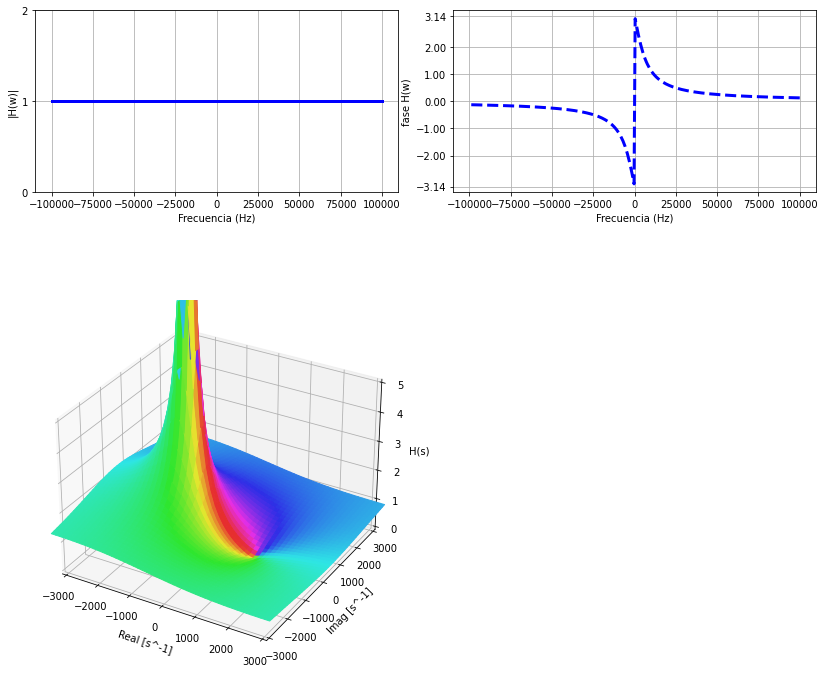

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import cmath
import mpmath
import numpy as np
import itertools

fpoints = np.linspace(100000, -100000, 300) #Puntos de frecuencia angular para graficos 1 y 2

srpoints = np.linspace(-3300,3300,50) #Puntos de frecuencia compleja para el grafico 3
sipoints = np.linspace(-3300,3300,50)
srpoints, sipoints = np.meshgrid(srpoints, sipoints)

fig = plt.figure(figsize = (14,14)) #Figura de matplotlib

ax1 = fig.add_subplot(2, 2, 1, box_aspect=0.5)#Grafico modulo
ax2 = fig.add_subplot(2, 2, 2, box_aspect=0.5)#Grafico fase
ax3 = fig.add_subplot(2, 2, 3, projection='3d')#Grafico H(s)

fig.subplots_adjust(hspace = 0, wspace=0.15)#Ajusto margenes

ax1.grid()#Configuro graficos
ax1.set_xlabel('Frecuencia (Hz)')
ax1.set_ylabel('|H(w)|')
ax1.set_yticks([0, 1, 2])
ax1.set_ylim(0, 2)

ax2.grid()
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('fase H(w)')
ax2.set_yticks([-3.14, -2, -1, 0, 1, 2, 3.14])

ax3.set_xlabel('Real [s^-1]')
ax3.set_ylabel('Imag [s^-1]')
ax3.set_zlabel('H(s)')
ax3.set_zlim(0, 5)
ax3.set_xlim(-3000, 3000)
ax3.set_ylim(-3000, 3000)


#Modificaciones de la funcion H(s) para graficar
Habs = lambda f: abs(H(1j*f/(2*cmath.pi))) #|H(wi)| en funcion de f
Harg = lambda f: mpmath.arg(H(1j*f/(2*cmath.pi)))# arg(H(wi))) en funcion de f
Hsabs = lambda r, i: abs(H(r + 1j*i))# |H(r, i)|
Hsarg = lambda r, i: np.angle(H(r + 1j*i)) #arg(H(r, i))

ax1.plot(fpoints, list(map(Habs, fpoints)), color = "b", lw = 3)#Grafico modulo
ax2.plot(fpoints, list(map(Harg, fpoints)), color = "b", ls='dashed', lw = 3)#Grafico fase

Z   = np.array([Hsabs(x, y) for x,y in zip(srpoints,sipoints)])#Puntos de H(s)

hue = np.array([Hsarg(x, y) for x,y in zip(srpoints,sipoints)]) #El hue depende de la fase
sat = 0.6*np.ones(Z.shape)#La sat y el val son fijos
val = 0.8*np.ones(Z.shape)

hue = hue/(hue.max())#Normalizo y arreglo algunas cosas y paso a RGB
norm = colors.Normalize()
rgb_colors = colors.hsv_to_rgb(norm(np.moveaxis(np.array([hue, sat, val]), 0, 2)))


ax3.plot_surface(srpoints, sipoints, Z, cmap="plasma", facecolors=rgb_colors)#Grafico H(s)b

### Conclusiones
Los graficos encontrados con python sobre la transferencia coinciden con los resultados analiticos encontrads al principio.

## Simulacion circuital

### Circuito

![title](https://github.com/brunogle/TrabajosSemanalesTC2/blob/master/TS1/img/circuit_ltspice.png?raw=1)

### Respuesta en frecuencia

![title](https://github.com/brunogle/TrabajosSemanalesTC2/blob/master/TS1/img/bode_sim.png?raw=1)

### Conclusiones

La simulacion en LTSpice coincide con los resultados analiticos y numericos encontrados anteriormente. La ganancia se mantiene en dentreo de los 2mdB para un amplio rango de frecuencias, y la fase obedece lo encontrado anteriormente. La curva de fase tiene una forma distinta a la del grafico de Python debido a escalas de frecuencias distintas (logaritmica en LTSpice versus lineal en Python)